# Grovers search algorithm

## Search problems

A lot of the problems that computers solve are types of _search problems_. You’ve probably already searched the web using a search engine, which is a program that builds a database from websites and allows you to search through it. We can think of a database as a program that takes an address as input, and outputs the data at that address. A phonebook is one example of a database; each entry in the book contains a name and number. For example, we might ask the database to give us the data in at the 3441<sup>st</sup> address, and it will return the 3441<sup>st</sup> name and number in the book.

![Information flow in a black box database](images/grover/database-phonebook.svg)

We call this process of providing an input and reading the output "querying the database". Often in computer science, we consider databases to be black boxes, which means we're not allowed to see how they work; we’ll just assume they're magical processes that do exactly as they promise. We call magical processes like these "oracles".

If we have someone's name and we’re trying to find their phone number, this is easy if the book is sorted alphabetically by name. We can use an algorithm called _binary search_.

<!-- ::: q-block -->

### Example: Binary search

<!-- ::: q-carousel -->

<!-- ::: div -->

![Example of a database](images/grover/carousel/0/0.svg)

Binary search is a very efficient classical algorithm for searching sorted databases, and you’ve probably used something similar when searching for a specific page in a book (or even using a physical phonebook). Let’s say we want to find Evelina's phone number.

<!-- ::: -->

<!-- ::: div -->

![Example of the first step of a binary search algorithm, the middle entry is selected](images/grover/carousel/0/1.svg)

First, we check the middle item in the database and see if it’s higher or lower than the item we’re searching for.

<!-- ::: -->

<!-- ::: div -->

![Second step of a binary search algorithm](images/grover/carousel/0/2.svg)

In this case “H” comes after “E”. Since the list is sorted we know that the address of the entry we’re looking for has to be lower than 7. We can ignore any addresses larger than 6 and repeat this algorithm on the reduced list.

<!-- ::: -->

<!-- ::: div -->

![Third step of a binary search algorithm](images/grover/carousel/0/3.svg)

This time, the middle entry’s name begins with “D”, which comes before “E”. Now we know our entry must have address higher than 3.

<!-- ::: -->

<!-- ::: div -->

![Fourth step of a binary search algorithm](images/grover/carousel/0/4.svg)

Each step halves the size of list we’re working on, so the search space _shrinks_ exponentially.

<!-- ::: -->

<!-- ::: div -->

![Fifth step of a binary search algorithm](images/grover/carousel/0/5.svg)

Which means that even with very large databases, we can find entries quickly.

<!-- ::: -->

<!-- ::: -->

<!-- ::: -->


<!-- ::: q-block.exercise -->

### Quick quiz

<!-- ::: q-quiz(goal="intro-grover-0") -->

The maximum number of database queries needed grows logarithmically (base 2) with the number of entries in the database.

<!-- ::: .question -->

Using binary search, what's the largest number of queries we'd need to search a sorted database with 1024 entries?

<!-- ::: -->

<!-- ::: .option(correct) -->

1. 10

<!-- ::: -->

<!-- ::: .option -->

2. 1

<!-- ::: -->

<!-- ::: .option -->

3. 100 

<!-- ::: -->

<!-- ::: -->

*Hint: how many times do you need to halve the database to be left with only one item?*

<!-- ::: -->

Since binary search grows logarithmically with the size of the database, there isn’t much room for improvement from a quantum computer. But we don’t always have the convenience of searching sorted lists. What if we were instead given a phone number, and we wanted to find the name associated with that number?

This is a lot more difficult, as phone books aren't usually sorted by number, so now there’s no way of homing in on our target as we did last time. Assuming the phone numbers are ordered randomly in the list, the best we can do with a classical computer is randomly pick an input address, see if it contains the phone number we’re looking for, and repeat until we happen upon the correct entry. For this reason, a lot of work goes into indexing databases to improve search times.

When the database is completely disordered like this, we say it's _unstructured_. And the quantum algorithm we'll learn about on this page is an algorithm for unstructured search.



<!-- ::: q-block.exercise -->

### Unstructured search

<!-- ::: q-quiz(goal="intro-grover-1") -->

<!-- ::: .question -->

If we search an unstructured database by randomly choosing inputs, how many inputs would we need to check on average before we find the entry we're looking for?

<!-- ::: -->

<!-- ::: .option(correct) -->

1. Half the possible inputs.

<!-- ::: -->

<!-- ::: .option -->

2. All the possible inputs.

<!-- ::: -->

<!-- ::: .option -->

3. Three-quarters of the possible inputs.

<!-- ::: -->

<!-- ::: -->

***

<!-- ::: q-quiz(goal="intro-grover-2") -->

<!-- ::: .question -->

Using random guessing, how does the average number of database queries needed grow with the number of entries in the database?

<!-- ::: -->

<!-- ::: .option(correct) -->

1. Linearly.

<!-- ::: -->

<!-- ::: .option -->

2. Logarithmically.

<!-- ::: -->

<!-- ::: .option -->

3. Quadratically.

<!-- ::: -->

<!-- ::: .option -->

4. Exponentially.

<!-- ::: -->

<!-- ::: -->

<!-- ::: -->

It may seem that we can't possibly do better than random guessing here; we don't have any idea where the correct entry will be in the database, and each incorrect query only rules out one entry. For classical computers, our intuition is correct, but it turns out that if we have a database we can query with a superposition of inputs, then we can do better than this! On this page we will learn about our first quantum algorithm: Grover's quantum search algorithm. When searching any database (structured or unstructured), Grover's algorithm grows with the _square root_ of the number of inputs, which for unstructured search is a quadratic improvement over the best classical algorithm.

![Comparison of best algorithm run times for quantum and classical unstructured search](images/grover/rg-vs-grover.svg)

## Beyond black boxes

Search algorithms can search databases of collected information such as phone books, but they can also do more than that. If we can make a problem _look_ like a database search problem, then we can use a search algorithm to solve it. For example, let’s consider the problem of solving a sudoku. If someone claims to have solved a sudoku, you can check if it’s solved pretty quickly: You check along each row, check along each column, check each square, and you’re finished. In this sense, _you_ are the database, and the person that gave you the solution is querying you. They are trying to find the input that returns the information “yes this is a valid solution”.

In fact, a lot of computational problems can be presented as "find the input that results in a certain output".

![A program that assesses proposed solutions can be viewed as a database.](images/grover/database-computation.svg)

One example of a problem we can solve like this is the Boolean satisfiability problem, or 'SAT'. 


## SAT problems

This is a widely studied problem in computer science, and lots of other computing problems can be converted to SAT problems. In this page we will use Grover’s algorithm to solve a simple SAT problem, and you can use the skills you learn here to apply quantum search algorithms to other problems.

A solution to a SAT problem is a string of bits, which makes it easy to map to a quantum circuit. The problem itself is essentially a bunch of conditions (we call them clauses) that rule out different combinations of bit values. For example, if we had three bits, one of the clauses might be "You can’t have the zeroth bit `ON` _and_ the first bit `OFF`", which would rule out the combinations `101` and `001` as valid solutions.

Here’s a file that encodes a 3-SAT problem, which is a type of SAT problem where every clause refers to exactly 3 bits, and one of these bit conditions in each clause must be satisfied. 

<!-- ::: q-block -->

### Example 3-SAT problem

Here is an examples of a 3-SAT problem, stored in a type of file format called "DIMACS CNF". These files are very simple and are just one way of storing SAT problems.


$\cssId{_dimacs-c}{\texttt{c example DIMACS-CNF 3-SAT}}$<br>
$\cssId{_dimacs-problem}{\texttt{p cnf 3 5}}$<br>
$\texttt{-1 -2 -3 0}$<br>
$\cssId{_dimacs-clause-1}{\texttt{1 -2 3 0}}$<br>
$\texttt{1 2 -3 0}$<br>
$\cssId{_dimacs-clause-3}{\texttt{1 -2 -3 0}}$<br>
$\cssId{_dimacs-clause-4}{\texttt{-1 2 3 0}}$<br>

<!-- ::: -->

Like with the sudoku, it’s easy to check if a bit string is a valid solution to a SAT problem, we just look at each clause in turn and see if our string disobeys any of them. We won’t worry about how we do this in a quantum circuit, just remember we have efficient algorithms for checking SAT solutions, and for now we’ll just use Qiskit’s built-in tools to build a circuit that does this for us.

We've saved this file under `examples/3sat.dimacs` (relative to the code we're running).

In [1]:
with open('examples/3sat.dimacs', 'r') as f:
    dimacs = f.read()
print(dimacs)  # let's check the file is as promised

c example DIMACS-CNF 3-SAT
p cnf 3 5
-1 -2 -3 0
1 -2 3 0
1 2 -3 0
1 -2 -3 0
-1 2 3 0


And we can use Qiskit's circuit library to build a circuit that does the job of the oracle we described above (we'll keep calling this circuit the 'oracle' even though it's no longer magic and all-powerful).

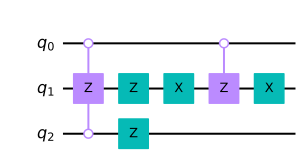

In [2]:
from qiskit.circuit.library import PhaseOracle
oracle = PhaseOracle.from_dimacs_file('examples/3sat.dimacs')
oracle.draw()

This circuit above acts similarly to the databases we described before. The input to this circuit is a string of 3 bits, and the output given depends on whether the input string is a solution to the SAT problem or not.

However, the behaviour is slightly different to how you might expect, as we need the output in a different form to use this circuit with Grover’s algorithm. The result of this checking computation will be either `True` or `False`, but instead of writing this output to a separate bit, we want the oracle to change the phase of the output state by 180° (i.e. multiply by -1) if the state is a solution. This is why the class is called `PhaseOracle`.

$$
U_\text{oracle}|x\rangle = \bigg\{
\begin{aligned}
\phantom{-}|x\rangle & \quad \text{if $x$ is not a solution} \\
-|x\rangle & \quad \text{if $x$ is a solution} \\
\end{aligned}
$$

For example, the only solutions to this problem are `000`, `011`, and `101`, so the circuit above has this matrix:

$$
U_\text{oracle} = 
\begin{bmatrix}
-1 & 0 & 0 &  0 & 0 &  0 & 0 & 0  \\
 0 & 1 & 0 &  0 & 0 &  0 & 0 & 0  \\
 0 & 0 & 1 &  0 & 0 &  0 & 0 & 0  \\
 0 & 0 & 0 & -1 & 0 &  0 & 0 & 0  \\
 0 & 0 & 0 &  0 & 1 &  0 & 0 & 0  \\
 0 & 0 & 0 &  0 & 0 & -1 & 0 & 0  \\
 0 & 0 & 0 &  0 & 0 &  0 & 1 & 0  \\
 0 & 0 & 0 &  0 & 0 &  0 & 0 & 1  \\
\end{bmatrix}
$$

To summarise:
1. There are problems for which it's easy to check if a proposed solution is correct.
2. We can convert an algorithm that checks solutions into a quantum circuit that changes the phase of solution states
3. We can then use Grover's algorithm to work out which states have their phases changed.

In this sense, the database or oracle _is the problem_ to be solved.

![Image showing input to Grover's algorithm as an oracle and output is a solution to that oracle](images/grover/grover-input-output.svg)

## Overview of Grover's algorithm

So, now we understand the problem, we finally come to Grover’s algorithm. There are essentially three steps to Grover’s algorithm: 

1. The first step is to create an equal superposition of every possible input to the oracle. If our qubits all start in the state $|0\rangle$, we can create this superposition easily by applying a H-gate to each qubit. We’ll call this equal superposition state '$|s\rangle$'.

2. The next step is to run the oracle circuit ($U_\text{oracle}$) on these qubits. On this page, we'll use the circuit (`oracle`) Qiskit created for us above, but we could use any circuit or hardware that changes the phases of solution states.

3. The final step is to run a circuit called the 'diffusion operator' or 'diffuser' ($U_s$) on the qubits. We'll go over this circuit when we explore Grover's algorithm in the next section, but it's a remarkably simple circuit that is the same for any oracle.

We then need to repeat steps 2 & 3 a few times depending on the size of the circuit. Note that step #2 is the step in which we query the oracle, so the number of times we do this is roughly proportional to the square root of the size of the number of possible inputs. If we repeat 2 & 3 enough times, then when we measure, we'll have a high chance of measuring a solution to the oracle.

![Compact circuit diagram of Grover's algorithm](images/grover/grover-circuit-high-level.png)

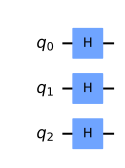

In [3]:
from qiskit import QuantumCircuit
init = QuantumCircuit(3)
init.h([0,1,2])
init.draw()

Next, we can again use Qiskit's tools to create a circuit that does steps 2 & 3 for us. 

In [4]:
from qiskit.circuit.library import GroverOperator
# steps 2 & 3 of Grover's algorithm
grover_operator = GroverOperator(oracle)

And we can combine this into a circuit that performs Grover's algorithm. Here, we won't repeat steps 2 & 3 as this is a small problem and doing them once is enough.

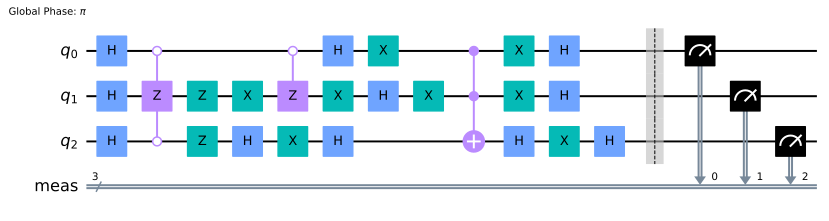

In [5]:
qc = init.compose(grover_operator)
qc.measure_all()
qc.draw()

Finally, let's run this on a simulator and see what results we get:

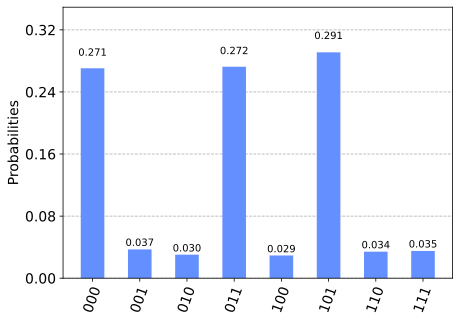

In [6]:
# Simulate the circuit
from qiskit import Aer, transpile
sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, sim)
counts = sim.run(t_qc).result().get_counts()

# plot the results
from qiskit.visualization import plot_histogram
plot_histogram(counts)

We have a high probability of measuring one of the 3 solutions to the SAT problem.

<!-- ::: q-block.exercise -->

### Quick quiz

<!-- ::: q-quiz(goal="intro-grover-3") -->

<!-- ::: .question -->

Which of these bit strings is a solution to the SAT problem solved by this quantum circuit?

<!-- ::: -->

<!-- ::: .option(correct) -->

1. `011`

<!-- ::: -->

<!-- ::: .option -->

2. `001`

<!-- ::: -->

<!-- ::: .option -->

3. `010`

<!-- ::: -->

<!-- ::: .option -->

3. `110`

<!-- ::: -->

<!-- ::: -->

<!-- ::: -->

## How does Grover's algorithm work?

So far, we’ve learnt about search problems and seen Grover’s algorithm used to solve one. But how, and why, does this work?

<!-- ::: q-block -->

### Visualising Grover's algorithm

<!-- ::: q-carousel -->

<!-- ::: div -->

A nice way to show Grover’s algorithm is geometrically. We’ve seen that quantum states can be represented through vectors, and with search problems like these, there are only two vectors we care about: The solutions, and everything else. We'll call the superposition of all solution states '$|✓\rangle$', so in the case of the SAT problem above:

$$|✓\rangle = \tfrac{1}{\sqrt{3}}(|000\rangle + |011\rangle + |101\rangle)$$

and we'll call the superposition of every other state '$|✗\rangle$':

$$|✗\rangle = \tfrac{1}{\sqrt{5}}(|001\rangle + |010\rangle + |100\rangle + |110\rangle + |111\rangle)$$

<!-- ::: -->

<!-- ::: div -->

**The plane**

![Image showing a |omega> and |s prime> as the y and x axis of a 2D space](images/grover/carousel/1/0.svg)

Since the two vectors $|✓\rangle$ and $|✗\rangle$ don't share any elements, they are perpendicular, so we can draw them at right angles on a 2D plane. These will be our y- and x-axes, respectively.

<!-- ::: -->

<!-- ::: div -->

**Step 1**

![Image showing a |omega> and |s prime> as the y and x axis of a 2D space](images/grover/carousel/1/1.svg)

Let's plot the states of our quantum computer on this plane at different points in the algorithm. The first state we'll plot is $|s\rangle$. This is the state _after_ step 1 (the initialisation step). This state is an equal superposition of all computational basis states. Since any possible state is either a solution or not a solution, $|s\rangle$ can be written as some combination of $|✓\rangle$ and $|✗\rangle$, so it sits inbetween them on the our plane.

$$|s\rangle = a|✗\rangle + b|✓\rangle$$

<!-- ::: -->

<!-- ::: div -->

**Step 1**

![Image showing |s> on the |omega> / |sprime> plane](images/grover/carousel/1/1.svg)

For difficult problems, we'd expect there to be lots of possible inputs, but only a small number of solutions. In this case, $|s\rangle$ would be much closer to $|✗\rangle$ than $|✓\rangle$ (i.e. the angle, $\theta$, between them is small), so it's unlikely that measuring our qubits would give us one of the computational basis states that make up $|✓\rangle$. Our goal is to end up with the computer in a state as close to $|✓\rangle$ as possible.

<!-- ::: -->

<!-- ::: div -->

**Step 2**

![Image showing U_omega|s> on the |omega> / |sprime> plane](images/grover/carousel/1/2.svg)

Next we pass our qubits through the circuit $U_\text{oracle}$. We saw above that, by definition, $U_\text{oracle}$ flips the phase of all solution states. In our diagram, this is a reflection through the vector $|✗\rangle$. I.e.:

$$a|✗\rangle + b|✓\rangle \xrightarrow{\text{oracle}} a|✗\rangle - b|✓\rangle$$

<!-- ::: -->

<!-- ::: div -->

**Step 3**

![Image showing U_omega|s> on the |omega> / |sprime> plane](images/grover/carousel/1/2.svg)

We've just seen that we can reflect through the vector $|✗\rangle$, so is there another vector could we reflect through that would move our state closer to $|✓\rangle$? The answer is 'yes', we can reflect through the vector $|s\rangle$. It may not be obvious at first how we can create a circuit that does this, but it's a relatively simple operation that we'll cover later in this page.

<!-- ::: -->

<!-- ::: div -->

**Finish (or repeat)**

![Image showing U_omega|s> on the |omega> / |sprime> plane](images/grover/carousel/1/3.svg)

Now our state vector is closer to $|✓\rangle$ than it was before, which means we have a higher chance of measuring one of our solution states. If there is only one solution, we need to repeat steps 2 & 3 sqrt(N) times to have the highest probability of measuring that solution.

<!-- ::: -->

<!-- ::: -->

<!-- ::: -->

<!-- ::: q-block -->

### How many times do we need to query the oracle?

<!-- ::: q-carousel -->

<!-- ::: div -->

![Image showing a |omega> and |s prime> as the y and x axis of a 2D space](images/grover/carousel/2/0.svg)

To work this out, we'll have to work how much each iteration rotates our state towards $|✓\rangle$. Let's say we're somewhere in the middle of our algorithm, the state of our computer ($|\psi\rangle$) is an angle $\phi$ from the starting state $|s\rangle$. The angle between $|\psi\rangle$ and $|✗\rangle$ is $\theta + \phi$.

<!-- ::: -->

<!-- ::: div -->

![Image showing a |omega> and |s prime> as the y and x axis of a 2D space](images/grover/carousel/2/1.svg)

The oracle reflects the state vector of our computer around $|✗\rangle$, so the angle between our new, reflected state vector ($|\psi'\rangle$) and $|✗\rangle$ will also be $\theta + \phi$.

<!-- ::: -->

<!-- ::: div -->

![Image showing |s> on the |omega> / |sprime> plane](images/grover/carousel/2/2.svg)

Next we reflect through $|s\rangle$. The angle between the state of our computer ($|\psi'\rangle$) and $|s\rangle$ is $2\theta + \phi$.

<!-- ::: -->

<!-- ::: div -->

![Image showing U_omega|s> on the |omega> / |sprime> plane](images/grover/carousel/2/3.svg)

So, after one iteration, we know the angle between the state of our computer and $|s\rangle$ is also $2\theta + \phi$.

<!-- ::: -->

<!-- ::: div -->

![Image showing U_omega|s> on the |omega> / |sprime> plane](images/grover/carousel/2/4.svg)

Which means each iteration rotates the state of our computer towards $|✓\rangle$ by $2\theta$.

<!-- ::: -->

<!-- ::: div -->

![Image showing U_omega|s> on the |omega> / |sprime> plane](images/grover/carousel/2/5.svg)

Now we just need to work out how many lots of $2\theta$ fit into a right angle, and this will be roughly the number of iterations needed to rotate $|s\rangle$ into $|✓\rangle$.

<!-- ::: -->

<!-- ::: div -->

![Image showing U_omega|s> on the |omega> / |sprime> plane](images/grover/carousel/2/6.svg)

So what's the angle $\theta$ in terms of $N$? With a bit of trigonometry, we know that $\sin(\theta)$ is equal to the $|✓\rangle$ component of $|s\rangle$, divided by the length of $|s\rangle$ (which is 1). If there's only one solution state, then $|s\rangle = \tfrac{1}{\sqrt{N}}(|0\rangle + |1\rangle \dots + |✓\rangle \dots + |N-1\rangle)$. So $\sin(\theta) = \tfrac{1}{\sqrt{N}}$.

<!-- ::: -->

<!-- ::: div -->

![Image showing U_omega|s> on the |omega> / |sprime> plane](images/grover/carousel/2/7.svg)

Finally, for difficult problems, $\theta$ will be very small, which means we can use the small angle approximation to say $\theta \approx \tfrac{1}{\sqrt{N}}$ radians.

<!-- ::: -->

<!-- ::: div -->

![Image showing U_omega|s> on the |omega> / |sprime> plane](images/grover/carousel/2/8.svg)

Since, for small $\theta$, we want to rotate $|s\rangle$ around $\pi/2$ radians, this means we need to do roughly $\tfrac{\pi}{2}\div\tfrac{2}{\sqrt{N}} = \tfrac{\pi}{4}\sqrt{N}$ iterations. Since we query the oracle once per iteration, the number of oracle queries needed is proportional to $\sqrt{N}$, if there is exactly one solution.

<!-- ::: -->

<!-- ::: -->

<!-- ::: -->

<!-- ::: q-block.exercise -->

### Quick quiz

<!-- ::: q-quiz(goal="intro-grover-4") -->

<!-- ::: .question -->

For an oracle with many possible inputs and exactly one solution, $\theta \approx \tfrac{1}{\sqrt{N}}$. What approximate value would $\theta$ have if there were _two_ solutions?

<!-- ::: -->

<!-- ::: .option -->

1. $\theta \approx \tfrac{2}{\sqrt{N}}$

<!-- ::: -->

<!-- ::: .option(correct) -->

2. $\theta \approx \tfrac{\sqrt{2}}{\sqrt{N}}$

<!-- ::: -->

<!-- ::: .option -->

3. $\theta \approx \tfrac{1}{\sqrt{2N}}$

<!-- ::: -->

<!-- ::: -->

<!-- ::: -->

## Circuits for Grover's algorithm

To round off the chapter, we’ll create a simple circuit from scratch that implements Grover’s algorithm and demonstrate it works. We’ll use two qubits, and we’ll start by creating an oracle circuit.

In [1]:
from qiskit import QuantumCircuit

### The oracle

To keep things simple, we're not going to solve a real problem here. For this demonstration, we'll create a circuit that flips the phase of the state $|11\rangle$ and leaves everything else unchanged. Fortunately, we already know of a two-qubit gate that does exactly that!

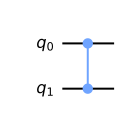

In [2]:
oracle = QuantumCircuit(2)
oracle.cz(0,1)  # invert phase of |11>
oracle.draw()

Here's a short function to show the matrix representation of this circuit:

In [5]:
def display_unitary(qc, prefix=""):
    """Simulates a simple circuit and display its matrix representation."""
    from qiskit import Aer
    from qiskit.visualization import array_to_latex
    sim = Aer.get_backend('aer_simulator')
    # next, we'll create a copy of the circuit and work on
    # that so we don't change anything as a side effect
    qc = qc.copy()
    # need to tell the simulator to save the unitary matrix of this circuit
    qc.save_unitary()
    unitary = sim.run(qc).result().get_unitary()
    display(array_to_latex(unitary, prefix=prefix))

display_unitary(oracle, "U_\\text{oracle}=")

<IPython.core.display.Latex object>

<!-- ::: q-block.exercise -->

### Try it

Can you create 3 more oracle circuits that instead target the other 3 computational basis states ($|00\rangle$, $|01\rangle$ and $|10\rangle$)? Use `display_unitary` to check your answer.

_Hint:_ Try to create circuits that transform $|11\rangle$ to and from the basis state you're targeting, can you then use these circuits with the `cz` gate?

[Try in IBM Quantum Lab](https://quantum-computing.ibm.com/lab)

<!-- ::: -->

### Creating the diffuser

Next we'll create a diffuser for two qubits. Remember that we want to do a reflection around the state $|s\rangle$, so let's see if we can use the tools we already have to build a circuit that does this reflection.

We've already seen that the `cz` gate does a reflection around $|11\rangle$ (up to a global phase), so if we know the transformation that maps $|s\rangle \rightarrow |11\rangle$, we can:
1. Do the transformation $|s\rangle \rightarrow |11\rangle$
2. Reflect around $|11\rangle$ (i.e the `cz` gate)
3. Do the transformation $|11\rangle \rightarrow |s\rangle$

We know that we can create the state $|s\rangle$ from a the state $|00\rangle$ by applying a H-gate to each qubit. Since the H-gate is it's own inverse, applying H-gates to each qubit also does $|s\rangle \rightarrow |00\rangle$.

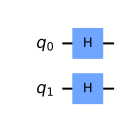

In [6]:
diffuser = QuantumCircuit(2)
diffuser.h([0,1])
diffuser.draw()

Now we need to work out how we transform $|00\rangle \rightarrow |11\rangle$.

<!-- ::: q-block.exercise -->

### Quick quiz

<!-- ::: q-quiz(goal="intro-grover-5") -->

<!-- ::: .question -->

Which of these gates transforms $|0\rangle \rightarrow |1\rangle$?

<!-- ::: -->

<!-- ::: .option(correct) -->

1. `x`

<!-- ::: -->

<!-- ::: .option -->

2. `z`

<!-- ::: -->

<!-- ::: .option -->

3. `h`

<!-- ::: -->

<!-- ::: .option -->

3. `s`

<!-- ::: -->

<!-- ::: -->

<!-- ::: -->

So applying an X-gate to each qubit will do the transformation $|00\rangle \rightarrow |11\rangle$. Let's do that:

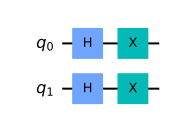

In [7]:
diffuser.x([0,1])
diffuser.draw()

Now we have the transformation $|s\rangle \rightarrow |11\rangle$, we can apply our `cz` gate and reverse the transformation.

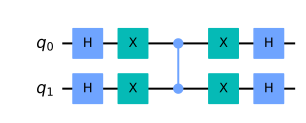

In [8]:
diffuser.cz(0,1)
diffuser.x([0,1])
diffuser.h([0,1])
diffuser.draw()

### Putting it together

We now have two circuits, `oracle` and `diffuser`, so we can easily put this together into a circuit that performs Grover's algorithm. Remember the three steps:
1. Initisialise the qubits to the state $|s\rangle$
2. Perform the oracle
3. Perform the diffuser

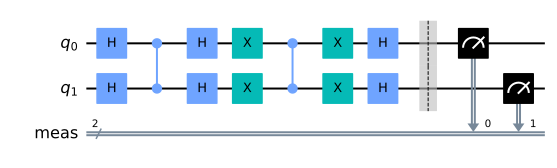

In [10]:
grover = QuantumCircuit(2)
grover.h([0,1])  # initialise |s>
grover = grover.compose(oracle)
grover = grover.compose(diffuser)
grover.measure_all()
grover.draw()

And when we simulate, we can see a 100% probability of measuring $|11\rangle$, which was the solution to our oracle!

In [11]:
from qiskit import Aer
sim = Aer.get_backend('aer_simulator')
sim.run(grover).result().get_counts()

{'11': 1024}

<!-- ::: q-block.exercise -->

### Try it

Try replacing the oracle in this circuit with the different oracles you created above. Do you get the expected result?

[Try in IBM Quantum Lab](https://quantum-computing.ibm.com/lab)

<!-- ::: -->